In [92]:
##importando bibliotecas:
import pandas as pd
import numpy as np
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy
import statsmodels
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl






In [93]:
#importando base de dados e fazendo leitura dos mesmos:
df = pd.read_csv('base_imoveis.csv', sep = ';')

In [94]:
df['preço'] = df['preço'].str.replace(',', '.')
df['preço'] = df['preço'].astype(float)

In [95]:
df['idade do prédio'] = df['idade do prédio'].str.replace(',', '.')
df['idade do prédio'] = df['idade do prédio'].astype(float)

In [96]:
df['andar'] = df['andar'].str.replace(',', '.')
df['andar'] = df['andar'].astype(float)

In [97]:
df['número de quartos'] = df['número de quartos'].str.replace(',', '.')
df['número de quartos'] = df['número de quartos'].astype(float)

In [98]:
df['vagas garagem'] = df['vagas garagem'].str.replace(',', '.')
df['vagas garagem'] = df['vagas garagem'].astype(float)

In [99]:
df['piscina?'] = df['piscina?'].str.replace(',', '.')
df['piscina?'] = df['piscina?'].astype(float)

In [100]:
df['Bairro A'] = df['Bairro A'].str.replace(',', '.')
df['Bairro A'] = df['Bairro A'].astype(float)

In [101]:
df['Bairro B'] = df['Bairro B'].str.replace(',', '.')
df['Bairro B'] = df['Bairro B'].astype(float)

In [102]:
##setando as variávei
df['tamanho'] = df['tamanho'].astype(float)

In [103]:
#amostra do inicio
df.head()

,preço,tamanho,idade do prédio,andar,número de quartos,vagas garagem,piscina?,Bairro A,Bairro B
0,814364.0,87.0,9.0,9.0,2.0,2.0,0.0,1.0,0.0
1,837887.0,86.0,10.0,1.0,2.0,2.0,1.0,1.0,0.0
2,1094109.0,105.0,8.0,12.0,4.0,2.0,1.0,0.0,0.0
3,727129.0,100.0,11.0,7.0,3.0,1.0,0.0,1.0,0.0
4,784800.0,88.0,8.0,13.0,2.0,1.0,0.0,0.0,1.0


In [104]:
##ajustes
df.dropna(axis =1,inplace = True)


In [105]:
#somando número de nulos
df.isnull().sum()

preço                0
tamanho              0
idade do prédio      0
andar                0
número de quartos    0
vagas garagem        0
piscina?             0
Bairro A             0
Bairro B             0
dtype: int64

In [106]:
#Visualização do Tamanho da Amostra

len(df)

40

In [107]:
#Definindo a Variável Dependente (A Variável que eu quero prever)

dependent_variable = 'preço'

In [108]:
#Construção das Variáveis Independentes 1

independent_variables = df.columns.tolist()

In [109]:
#Construção das Variáveis Independentes 1.1

independent_variables.remove(dependent_variable)

In [110]:
#Visualização das Variáveis Independentes

independent_variables

['tamanho',
 'idade do prédio',
 'andar',
 'número de quartos',
 'vagas garagem',
 'piscina?',
 'Bairro A',
 'Bairro B']

In [111]:
# X e Y transformados em valores

X = df[independent_variables].values
y = df[dependent_variable].values

In [112]:
#Separação do Modelo de Treinamento e Modelo de Comparação de Resultados

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 0)

In [113]:
#Importando o Modelo de Regressão Linear do pacote SkLEARN

from sklearn.linear_model import LinearRegression
Lr = LinearRegression()

In [114]:
#Modelando 1.0

Lr.fit(X_train,y_train)

LinearRegression()

In [115]:
#Modelando 1.1
#Interpecto da Regressão
c = Lr.intercept_

In [116]:
#Visualizando o Intercepto
c

381001.9662173756

In [117]:
#Modelando 1.2

#Coeficiente das Variáveis Independentes

m = Lr.coef_

#Visualização dos Coeficientes

m

array([   8466.24654483,  -17210.32648254,    1599.41802112,
        -54668.29357339,   82240.90077061,   56659.60837932,
       -242396.13682545, -134489.9222981 ])

In [118]:
#Modelando 1.3

y_pred_train = Lr.predict(X_train)

In [119]:
y_pred_train

array([ 711682.76405435,  658557.41879135,  927697.68117467,
        614923.2899434 ,  929105.77614943, 1153936.49344504,
        862610.87807248,  944457.87347974,  982737.84197266,
        944562.68617958, 1211955.89428505,  972393.06125998,
        941395.47272548, 1142665.55572723,  657401.20992774,
        928605.14967533,  783223.49186648,  870446.54051297,
        938548.28584487,  808004.00821711,  772786.0543273 ,
        714469.89208403,  950152.00301583, 1026655.71118755,
       1064946.26412958,  822720.2322878 ,  687943.52510324,
        853675.47508842,  815663.18226756, 1171263.13140398,
        725348.83876564,  789816.31703412])

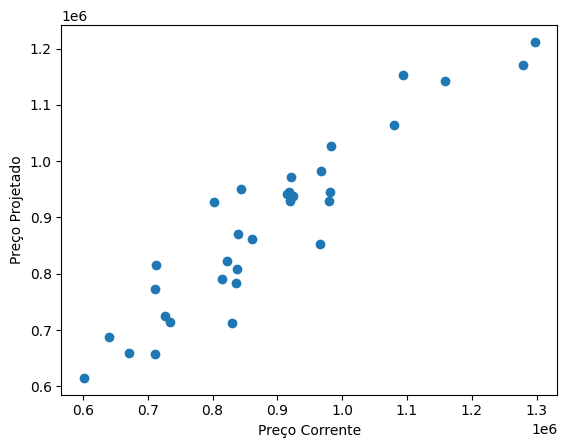

In [120]:
#Comparação Gráfica Preço da Base x Preço Projetado Modelo

plt.scatter(y_train,y_pred_train)
plt.xlabel('Preço Corrente')
plt.ylabel('Preço Projetado')
plt.show()

In [121]:
#Visualização do R² (Comparação Entre Y_train x Y_Pred_train)

from sklearn.metrics import r2_score

r2_score(y_train,y_pred_train)


0.8719754583145498